# Project Proposal Preliminary

### Objectives: Identify key factors for the national health & phase difference between the factors and outcomes
By finding the level of correlation and phase relation between the trend of the funding, technology, gov.t policy and the U.S. health, I hope to identify the principle components that has signaficant effect in the national health.
In addition, I also would like to find out the time required for the factors to be effective to the health

In [5]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import time
import datetime
from bs4 import BeautifulSoup
# %matplotlib notebook

#### Data Scraping from the National Cancer Institute: Funding

In [35]:
years = np.arange(1998, 2018);
i = 0;
total_funding = np.zeros(len(years))
for year in years:
    
    
    url = "https://fundedresearch.cancer.gov/nciportfolio/search/ResultManager?fy=PUB"+str(year)+"&site=Leukemia";
    response = requests.get(url).content;
    df_list = pd.read_html(response);
    funding=df_list[:][3][df_list[:][3].columns[3]];
    total_funding[i] = sum(funding[0:-1].dropna().replace('[\$,]', '', regex=True).astype(float));
    i = i+1;
years = np.arange(1998, 2018);

#### Data Scraping from the National Cancer Institute: Drugs and Dates

In [34]:
url = "https://www.cancer.gov/about-cancer/treatment/drugs/leukemia";
response = requests.get(url);
soup = BeautifulSoup(response.text, "html.parser")

hlinks = soup.findAll('a')

index = []
drug_years = []

i = 0

for soup_format in hlinks:
    
    if "canonical" in str(soup_format):
        
        index.append(i)
        link = soup_format['href']
        drug_url = "https://www.cancer.gov"+ link
        drug_response = requests.get(drug_url);
        drug_soup = BeautifulSoup(drug_response.text, "html.parser")
        time = drug_soup.findAll('time')
        drug_years.append(datetime.datetime.strptime(time[0].get('datetime'), '%Y-%m-%dT%H:%M:%SZ').year)
        
    i = i+1;

approval_years = pd.Series(drug_years)
approval_years = approval_years.value_counts().sort_index()

#### Data Scraping from the National Cancer Institute: Stats

In [33]:
url = "https://seer.cancer.gov/statfacts/html/leuks.html";
health_response = requests.get(url);
health_soup = BeautifulSoup(health_response.text, "html.parser")
table = health_soup.select_one(".scrapeTable")

Health_table = pd.read_html(str(table))[0]

Health_year = Health_table[Health_table.columns[0]]
Health_diag = Health_table[Health_table.columns[1]]
Health_death = Health_table[Health_table.columns[5]]
Health_survive = Health_table[Health_table.columns[7]]

P_Surv = Health_survive.str.replace('%', '', regex = True)[:37].astype('float64')

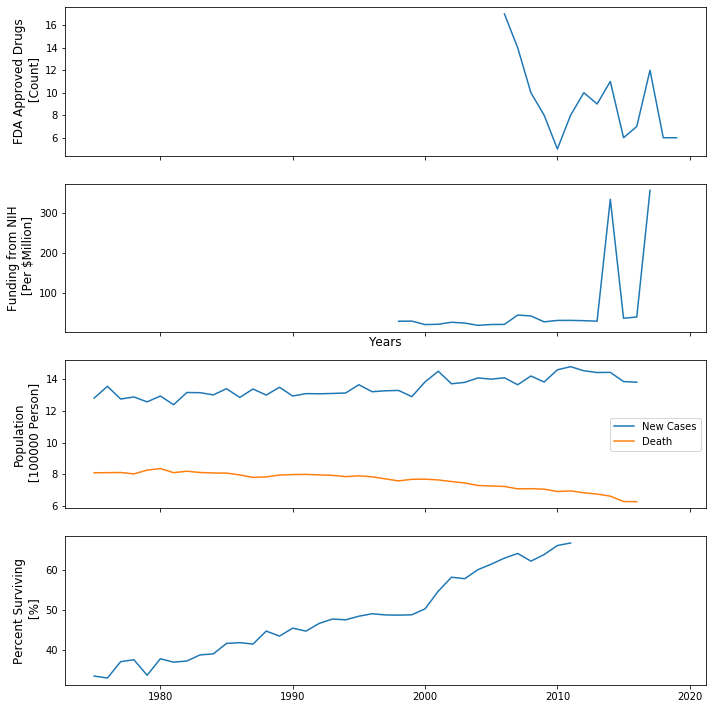

In [32]:
fig, axs = plt.subplots(4,1,figsize = (10, 10), sharex =True)

ax = axs[2]
ax.plot(Health_year,Health_diag)
ax.plot(Health_year,Health_death)
ax.set_ylabel('Population\n [100000 Person]', fontsize = 12)
ax.legend(['New Cases', 'Death'])

ax = axs[3]
ax.plot(Health_year[:37],P_Surv)
ax.set_ylabel('Percent Surviving\n [%]', fontsize = 12)

ax = axs[0]
ax.plot(approval_years)
ax.set_ylabel('FDA Approved Drugs\n [Count]', fontsize = 12)

ax = axs[1]
ax.plot(years, total_funding/1000000)
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Funding from NIH\n [Per $Million]', fontsize = 12)
plt.tight_layout()